In [ ]:
###################################################################
# University of Toronto
# Faculty of Information
# Master of Information Program
# INF 1340H - Programming for Data Science
# Student Name: Athavan Vasantharaj, Van Ngo, Guanyu Mao
# Student Number: 1011482995, 1011167675, 1011647309
#
#
#
# Assignment 4
# Purpose: Completion of Assignment 4
# Date Created: November 9th 2024
# Date Modified: December 4th 2024
###################################################################

# Data Fetching
1. The ucimlrepo library is installed to fetch datasets from the UCI Machine Learning Repository.
2. X is the dataframe for the independent variables, Y is the dataframe for the target variable(lable).
3. The structure of the dataset is printed.

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

# metadata
print(default_of_credit_card_clients.metadata)

# variable information
print(default_of_credit_card_clients.variables)

{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

# Library and Packages
1. Core Libraries: Pandas and NumPy for data structure and operations.
2. Visualization Tools: Matplotlib and Seaborn for plotting graphs and statistical visulizations.
3. Machine Learning Packages: Scikit-learn provides logistic regression, standardization scaler, decison trees, split training models, Gaussian Naive Bayes algorithms.
4. Statistical Analysis: SciPy features t-test and chi-square test

In [ ]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ssl import create_default_context
import plotly.express as px
import plotly.graph_objs as go
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import ttest_ind, chi2_contingency

# Data Encoding
1. The original data was previously encoded.
2. This section maps encoded numerical values to categorical lables to reveal more insights for interpretation.

In [ ]:
### This code is for explainatory and illustrative purpose as the data had been encoded previously

# Encode categorical data using label encoding for Gender
def encode_gender(df):
  df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})
  return df

# Encode categorical data using label encoding for Education
def encode_education(df):
  df['EDUCATION'] = df['EDUCATION'].map({1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'})
  return df

# Encode categorical data using label encoding for Marital Status
def encode_marital_status(df):
  df['MARRIAGE'] = df['MARRIAGE'].map({1: 'Married', 2: 'Single', 3: 'Others'})
  return df

# Encode categorical data using label encoding for Pay_0, Pay_2, Pay_3, Pay_4, Pay_5, and Pay_6
def encode_pay_columns(df):
  pay_columns = ['PAY0', 'PAY2', 'PAY3', 'PAY4', 'PAY5', 'PAY6']
  for col in pay_columns:
    df = df[col].map({-2: 'missing data, no record, or inactive account', -1: 'pay duly', 0: 'on-time payment',
                 1: 'delay for 1 month', 2: 'delay for 2 months', 3: 'delay for 3 months', 4: 'delay for 4 months', 5: 'delay for 5 months', 6: 'delay for 6 months',
                 7: 'delay for 7 months', 8: 'delay for 8 months', 9: 'delay for 9 months'})
  return df

# Encode target column for prediction using label encoding
def encode_target(df):
  df['Default'] = df['Default'].map({1: 'Yes', 0: 'No'})
  return df

# Data Cleaning
1. Combining independent variables and target label to create a new dataframe.
2. Renaming columns to replace deflaut columns for clarity.
3. Covert variables to appropriate types.
4. Handling missing values. Numeric columns are replaced with their mean value. Categorical columns are replaced with their mode value.
5. Checking and removing deplicated rows.
6. identify and print out unique values for categorical columns.
7. Dirty data check: making sure age and credit limit are greater than 0
8. Resolving inconsistencies: undefined and inconsistent values in 'EDUCATION' and 'MARRIAGE' are replaced with appriate categories.
9. Outlier Detection adn Outlier removal
10. Showing the cleaned and processed Dataframe

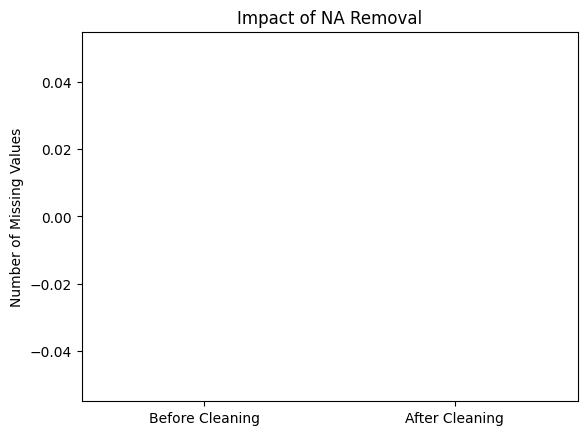

Number of duplicate rows: 35
Duplicates removed.


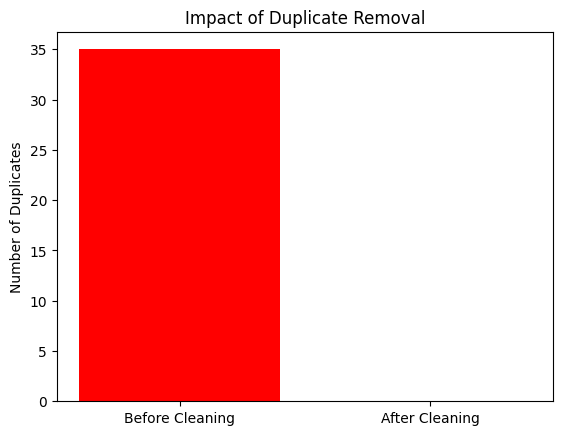

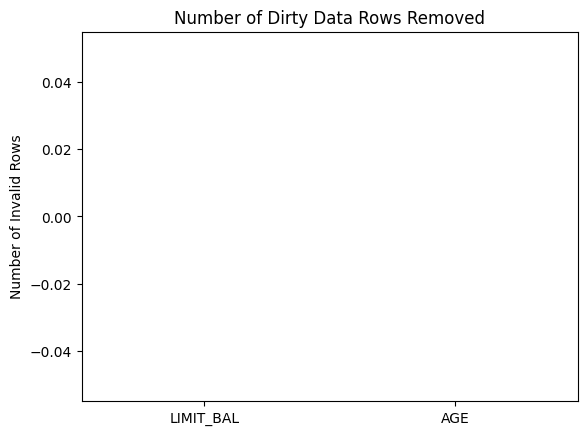

Unique values in SEX: [1, 2]
Unique values in EDUCATION: [0, 1, 2, 3, 4, 5, 6]
Unique values in MARRIAGE: [0, 1, 2, 3]
Inconsistent EDUCATION values before: 331
Inconsistent MARRIAGE values before: 54


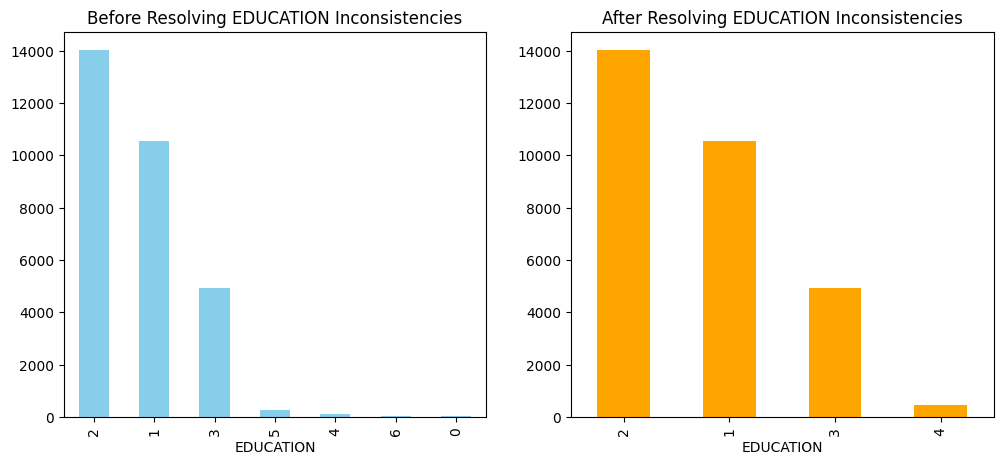

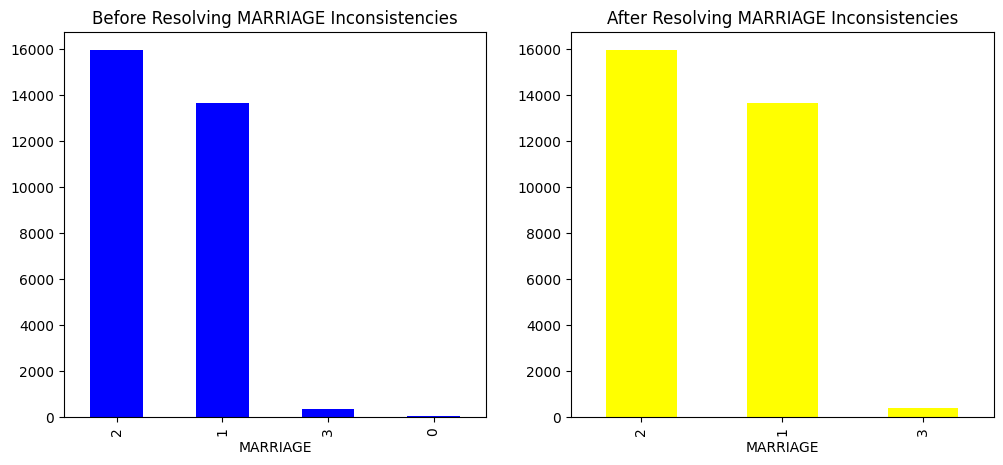

Number of outliers in LIMIT_BAL: 167


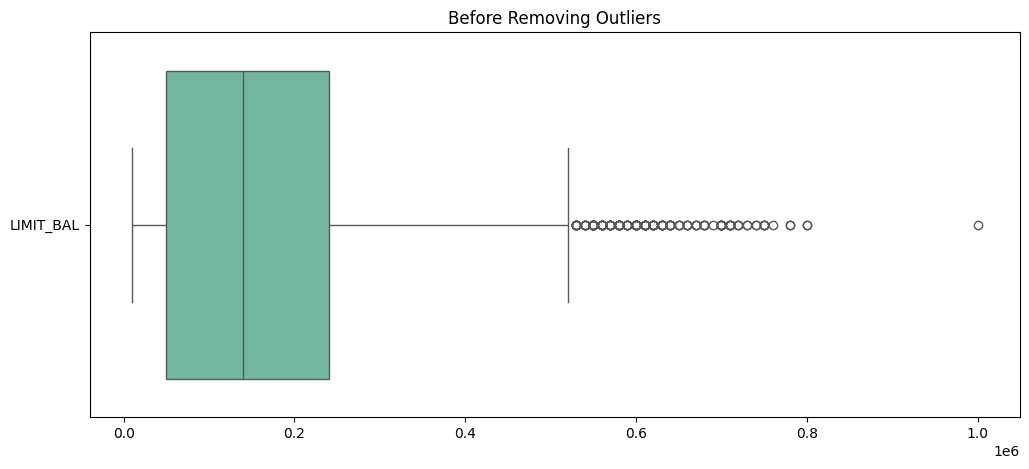

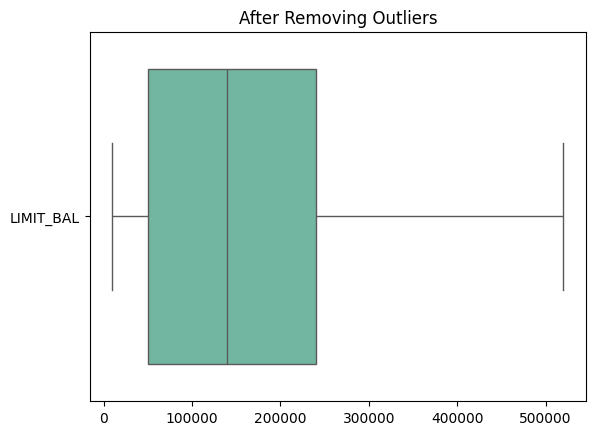

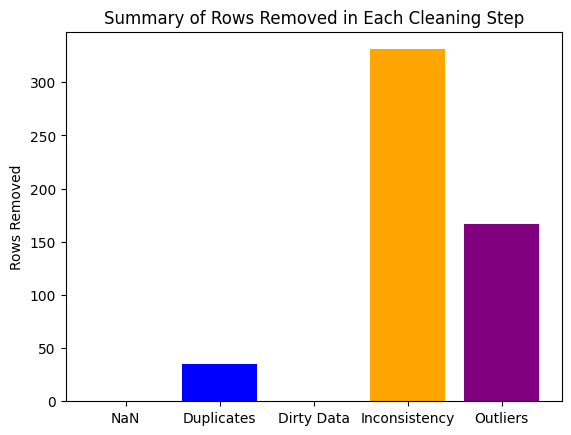

<class 'pandas.core.frame.DataFrame'>
Index: 29798 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  29798 non-null  float64
 1   SEX        29798 non-null  int64  
 2   EDUCATION  29798 non-null  int64  
 3   MARRIAGE   29798 non-null  int64  
 4   AGE        29798 non-null  int64  
 5   PAY0       29798 non-null  int64  
 6   PAY2       29798 non-null  int64  
 7   PAY3       29798 non-null  int64  
 8   PAY4       29798 non-null  int64  
 9   PAY5       29798 non-null  int64  
 10  PAY6       29798 non-null  int64  
 11  BILL1      29798 non-null  int64  
 12  BILL2      29798 non-null  int64  
 13  BILL3      29798 non-null  int64  
 14  BILL4      29798 non-null  int64  
 15  BILL5      29798 non-null  int64  
 16  BILL6      29798 non-null  int64  
 17  AMT1       29798 non-null  int64  
 18  AMT2       29798 non-null  int64  
 19  AMT3       29798 non-null  int64  
 20  AMT4       

In [ ]:
# Create the initial data frame
credit_data = pd.concat([X, y], axis=1)

# Rename the columns for clarity
rename = {"X1": "LIMIT_BAL", "X2": "SEX", "X3": "EDUCATION", "X4": "MARRIAGE", "X5": "AGE",
          "X6": "PAY0", "X7": "PAY2", "X8": "PAY3", "X9": "PAY4", "X10": "PAY5", "X11": "PAY6",
          "X12": "BILL1", "X13": "BILL2", "X14": "BILL3", "X15": "BILL4", "X16": "BILL5", "X17": "BILL6",
          "X18": "AMT1", "X19": "AMT2", "X20": "AMT3", "X21": "AMT4", "X22": "AMT5", "X23": "AMT6", "Y": "Default"}

# Rename columns
credit_data.rename(columns=rename, inplace=True)

# Convert LIMIT_BAL into continuous variable
def convert_to_float(df):
    monetary_columns = ['LIMIT_BAL']
    for col in monetary_columns:
        df[col] = df[col].astype(float)
    return df

credit_data = convert_to_float(credit_data)

# Create a copy before handling missing values
df_before_na = credit_data.copy()

# Impute missing values
def replace_missing_values(df):
  for col in df.columns:
    if df[col].dtype == 'float64':
      return df.fillna(df.mean()) # Replacing missing data with the average value for numeric columns
    elif df[col].dtype == 'object':
      return df.fillna(df.mode()) # Replacing missing data with the most frequent value for categorical columns

credit_data = replace_missing_values(credit_data)

# Visualization for NaN
def plot_missing_values(df_before, df_after, title='Impact of NA Removal'):
    # Get the total number of missing values before and after cleaning
    na_before = df_before.isnull().sum().sum()
    na_after = df_after.isnull().sum().sum()

    # Plot the bar chart
    plt.bar(['Before Cleaning', 'After Cleaning'], [na_before, na_after], color=['red', 'green'])
    plt.ylabel('Number of Missing Values')
    plt.title(title)
    plt.show()

plot_missing_values(df_before_na, credit_data)

# Create a copy before handling duplicates
df_before_duplicates = credit_data.copy()

# Check and remove duplicates
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    df = df.drop_duplicates()
    print("Duplicates removed.")
    return df

credit_data = check_duplicates(credit_data)

# Visualization for duplicates
def plot_duplicates(df_before, df_after, title='Impact of Duplicate Removal'):
    # Get the total number of duplicated values before and after cleaning
    duplicates_before = df_before.duplicated().sum()
    duplicates_after = df_after.duplicated().sum()

    # Plot the bar chart
    plt.bar(['Before Cleaning', 'After Cleaning'], [duplicates_before, duplicates_after], color=['red', 'green'])
    plt.ylabel('Number of Duplicates')
    plt.title(title)
    plt.show()

plot_duplicates(df_before_duplicates, credit_data)

# Create a copy before handling dirty data
df_before_removing_dirty_data = credit_data.copy()

# Remove dirty data (equal and below 0) in LIMIT_BAL & AGE
def remove_dirty_data(df, column_name):
    return df[df[column_name] > 0]

credit_data = remove_dirty_data(credit_data, "LIMIT_BAL")
credit_data = remove_dirty_data(credit_data, "AGE")

# Visualization for dirty data
def plot_dirty_data(df, columns, thresholds, title='Number of Dirty Data Rows Removed'):
    dirty_counts = [((df[column] <= threshold).sum()) for column, threshold in zip(columns, thresholds)]

    # Plot the bar chart
    plt.bar(columns, dirty_counts, color=['purple', 'cyan'])
    plt.ylabel('Number of Invalid Rows')
    plt.title(title)
    plt.show()

columns = ['LIMIT_BAL', 'AGE']
thresholds = [0, 0]
plot_dirty_data(df_before_removing_dirty_data, columns, thresholds)

# Check for unique values
def unique_values(df):
  categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']
  for col in categorical_columns:
    unique_values = sorted(df[col].unique())
    print(f"Unique values in {col}: {unique_values}")

unique_values(credit_data)

# Create a copy before resolving inconsistencies
df_before_inconsistencies = credit_data.copy()

# Resolve inconsistencies
def resolve_inconsistencies(df):
    print(f"Inconsistent EDUCATION values before: {(df['EDUCATION'] > 4).sum()}")
    print(f"Inconsistent MARRIAGE values before: {(df['MARRIAGE'] == 0).sum()}")
    return df.replace({'EDUCATION': {0: 4, 5: 4, 6: 4}, 'MARRIAGE': {0: 3}})

credit_data = resolve_inconsistencies(credit_data)

# Visualization for inconsistencies
def plot_inconsistencies(df_before, df_after, column_name, color_before, color_after, title_before, title_after):
    before_counts = df_before[column_name].value_counts()
    after_counts = df_after[column_name].value_counts()

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    before_counts.plot(kind='bar', ax=ax[0], color=color_before, title=title_before)
    after_counts.plot(kind='bar', ax=ax[1], color=color_after, title=title_after)
    plt.show()

# Plot EDUCATION and MARRIAGE inconsistencies
plot_inconsistencies(df_before_inconsistencies, credit_data, 'EDUCATION', 'skyblue', 'orange',
                     'Before Resolving EDUCATION Inconsistencies', 'After Resolving EDUCATION Inconsistencies')
plot_inconsistencies(df_before_inconsistencies, credit_data, 'MARRIAGE', 'blue', 'yellow',
                     'Before Resolving MARRIAGE Inconsistencies', 'After Resolving MARRIAGE Inconsistencies')

# Count inconsistencies
def count_inconsistencies(df):
    return (
        len(df[df['EDUCATION'] > 4]),  # Count of inconsistent EDUCATION values
        len(df[df['MARRIAGE'] > 3])    # Count of inconsistent MARRIAGE values
    )

# Get total number of inconsistent rows removed
inconsistent_education_count, inconsistent_marriage_count = count_inconsistencies(df_before_inconsistencies)
inconsistent_data_removed = inconsistent_education_count + inconsistent_marriage_count

# Create a copy before removing outliers
df_before_outliers = credit_data.copy()

# Check for outliers
def outliers(df):
  for col in df.columns:
    if df[col].dtype == 'float64':
      q1 = df[col].quantile(0.25)
      q3 = df[col].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
      print(f"Number of outliers in {col}: {len(outliers)}")

outliers(credit_data)

# Remove outliers
def remove_outliers(df):
  for col in df.columns:
    if df[col].dtype == 'float64':
      q1 = df[col].quantile(0.25)
      q3 = df[col].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

credit_data = remove_outliers(credit_data)

# Visualization for outliers
def plot_outliers(df_before, df_after, column, title_before='Before Removing Outliers', title_after='After Removing Outliers'):
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df_before[[column]], orient='h', palette="Set2")
    plt.title(title_before)
    plt.show()

    sns.boxplot(data=df_after[[column]], orient='h', palette="Set2")
    plt.title(title_after)
    plt.show()

plot_outliers(df_before_outliers, credit_data, 'LIMIT_BAL')

# Visualization for cleaning summary
def plot_cleaning_summary(steps, rows_removed, title='Summary of Rows Removed in Each Cleaning Step'):
    plt.bar(steps, rows_removed, color=['red', 'blue', 'green', 'orange', 'purple'])
    plt.ylabel('Rows Removed')
    plt.title(title)
    plt.show()

# Cleaning summary
def cleaning_summary(df, df_before_na, df_before_duplicates, df_before_removing_dirty_data, df_before_inconsistencies, df_before_outliers, credit_data):
    # Cleaning steps
    na_before = df_before_na.isnull().sum().sum()  # Total missing values before cleaning
    duplicates_before = df_before_duplicates.duplicated().sum()  # Total duplicates before cleaning
    dirty_limit_bal_count = (df_before_removing_dirty_data['LIMIT_BAL'] <= 0).sum()  # Dirty LIMIT_BAL count
    dirty_age_count = (df_before_removing_dirty_data['AGE'] <= 0).sum()  # Dirty AGE count
    inconsistent_data_removed # Total inconsistent data removed
    outliers_removed = len(df_before_outliers) - len(credit_data)  # Total outliers removed

    # Summary of steps and rows removed
    steps = ['NaN', 'Duplicates', 'Dirty Data', 'Inconsistency', 'Outliers']
    rows_removed = [
        na_before,
        duplicates_before,
        dirty_limit_bal_count + dirty_age_count,
        inconsistent_data_removed,
        outliers_removed
    ]

    return steps, rows_removed

steps, rows_removed = cleaning_summary(credit_data, df_before_na, df_before_duplicates, df_before_removing_dirty_data, df_before_inconsistencies, df_before_outliers, credit_data)
plot_cleaning_summary(steps, rows_removed)

# Preview data
credit_data.info()

# Descriptive Analytics
1. Using describe( ) function to provide a quick overview of the dataset's numeric columns, measuring like mean, min, max and standard deviation etc.
2. Checking Skeweness to measure the asymmetry in the distribution.checking kurtosis to measure how data disperse between a distribution's center and tails.
3. Inspecting and visualize numeric column distributions using histogram and boxplot
4. Checking and displaying frequency distribution for the categorical values.
5. The segment_age function bins the AGE column into labeled age groups
6. Creating a pivot table to analyze the average credit limit grouped by sex, education and marriage. Creating another pivot table to explore the default proportion grouped by sex, age, education and marriage.

           LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count   29798.000000  29798.000000  29798.000000  29798.000000  29798.000000   
mean   164917.768978      1.604034      1.844117      1.557554     35.466441   
std    125536.141252      0.489065      0.744163      0.521537      9.219914   
min     10000.000000      1.000000      1.000000      1.000000     21.000000   
25%     50000.000000      1.000000      1.000000      1.000000     28.000000   
50%    140000.000000      2.000000      2.000000      2.000000     34.000000   
75%    240000.000000      2.000000      2.000000      2.000000     41.000000   
max    520000.000000      2.000000      4.000000      3.000000     79.000000   

               PAY0          PAY2          PAY3          PAY4          PAY5  \
count  29798.000000  29798.000000  29798.000000  29798.000000  29798.000000   
mean      -0.015068     -0.130311     -0.162897     -0.217498     -0.263407   
std        1.123961      1.197163      1.1

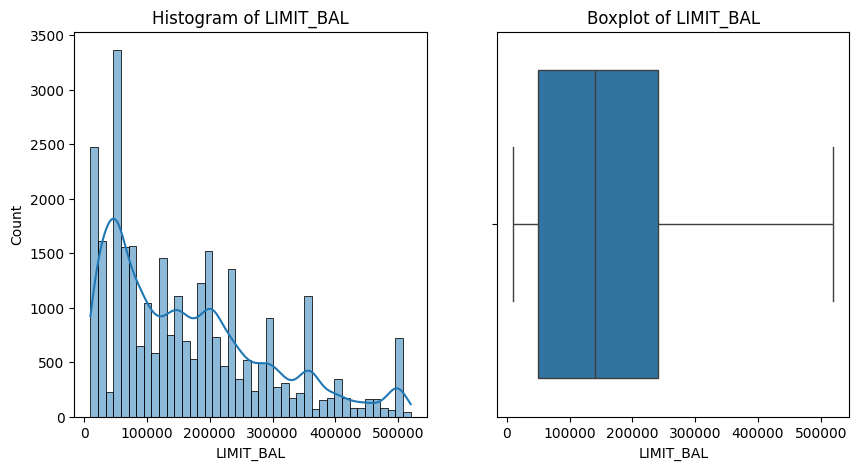

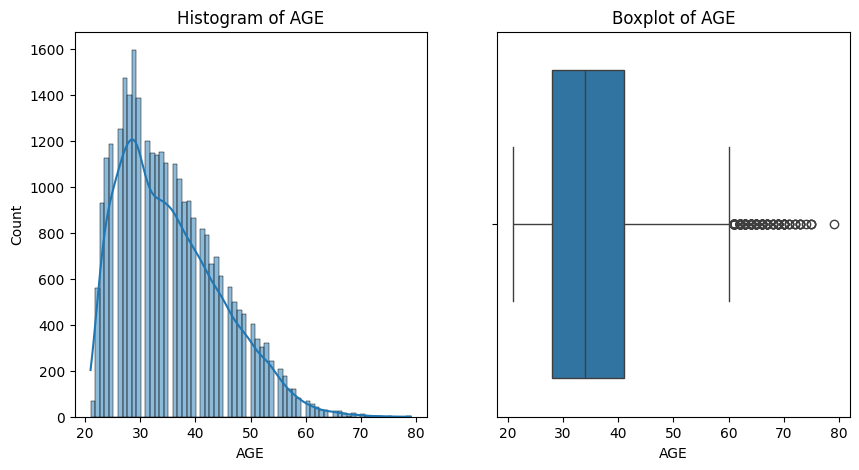

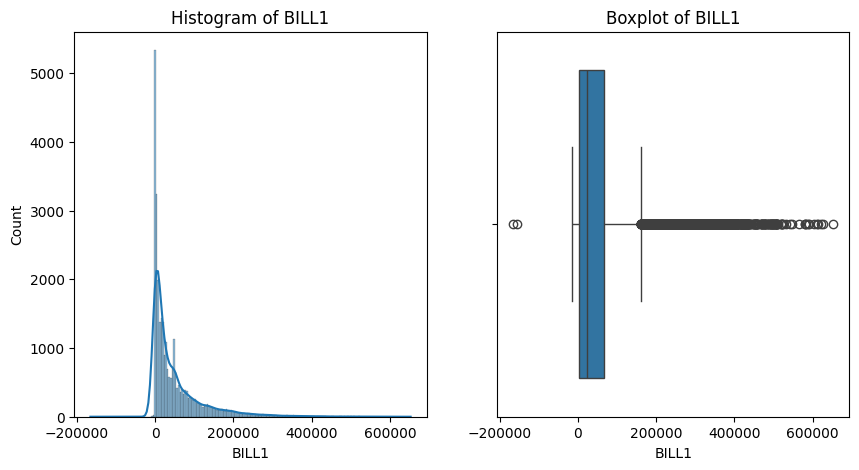

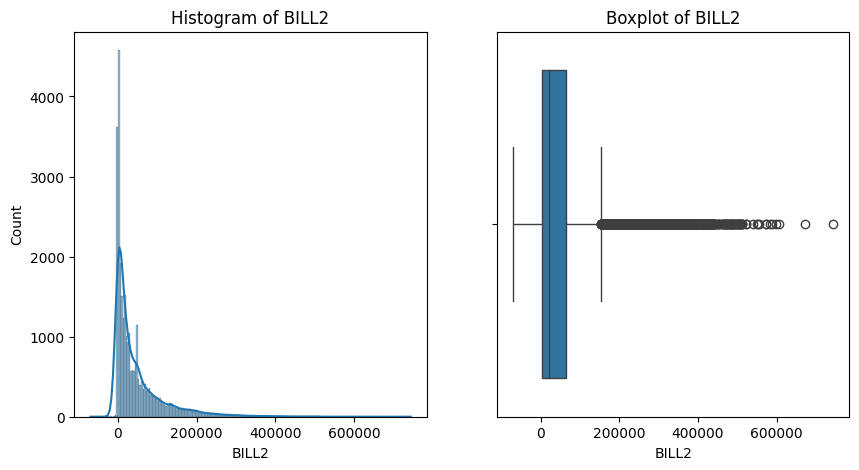

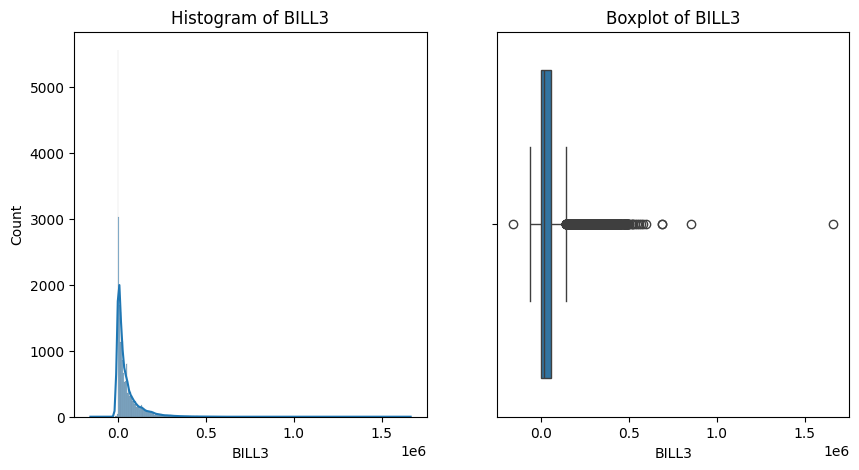

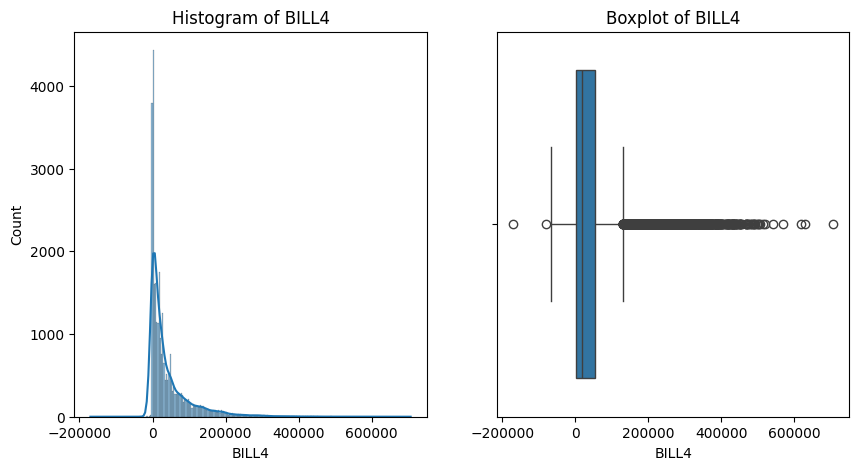

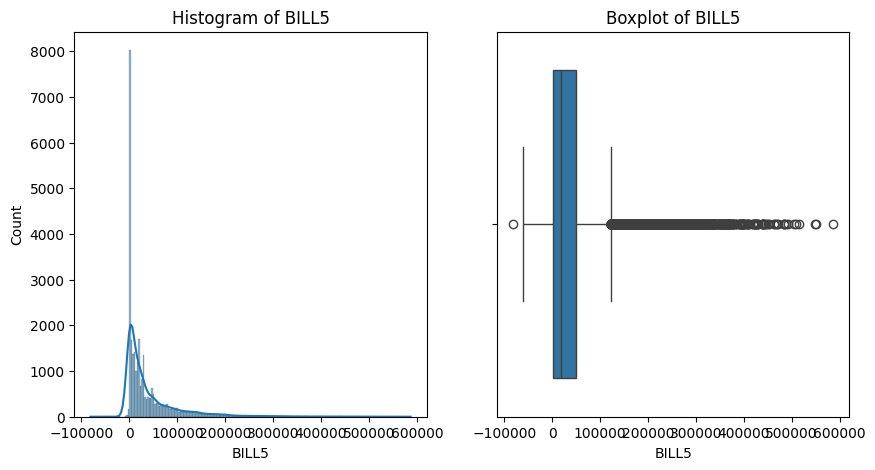

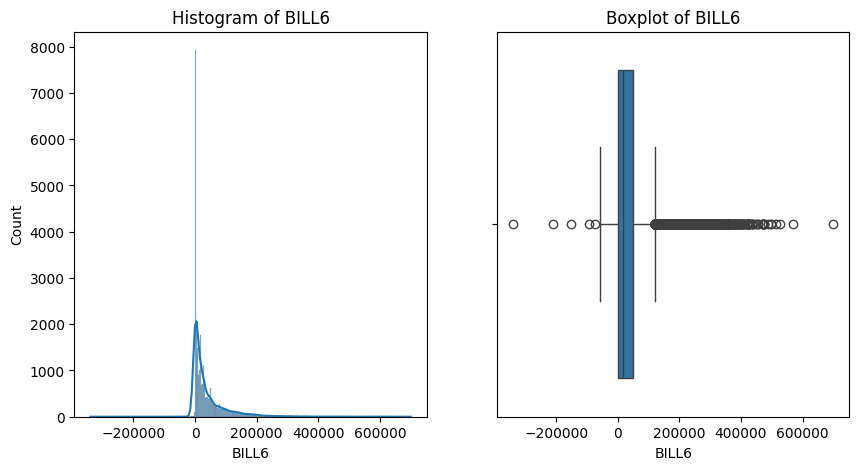

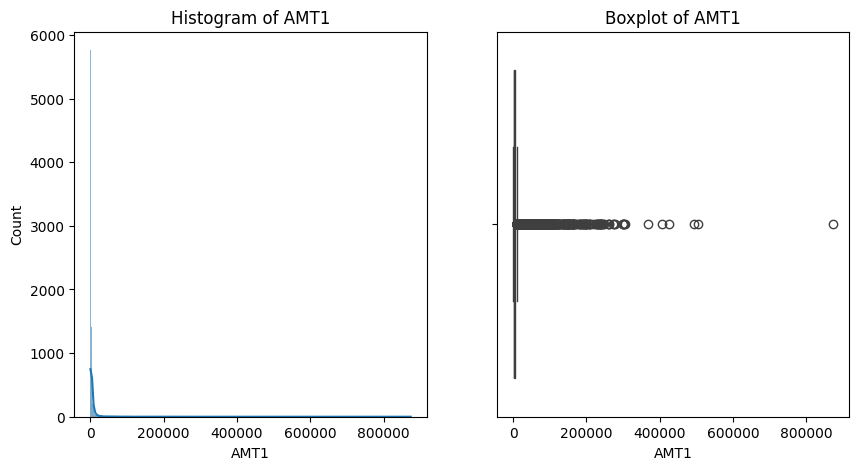

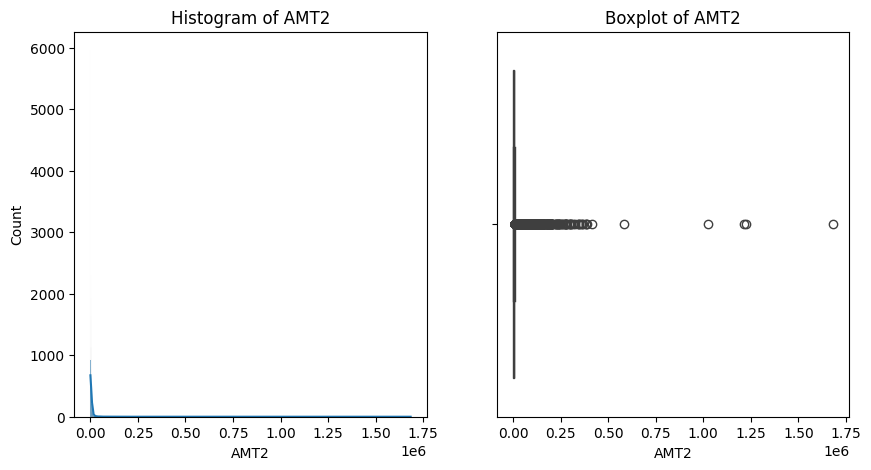

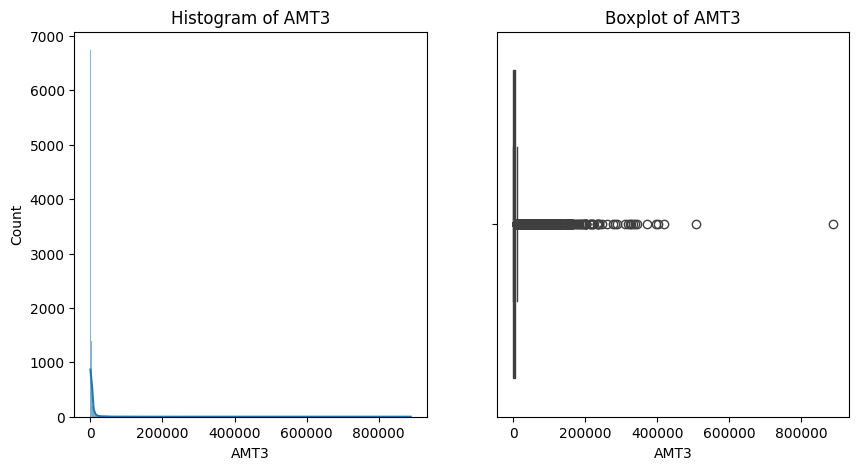

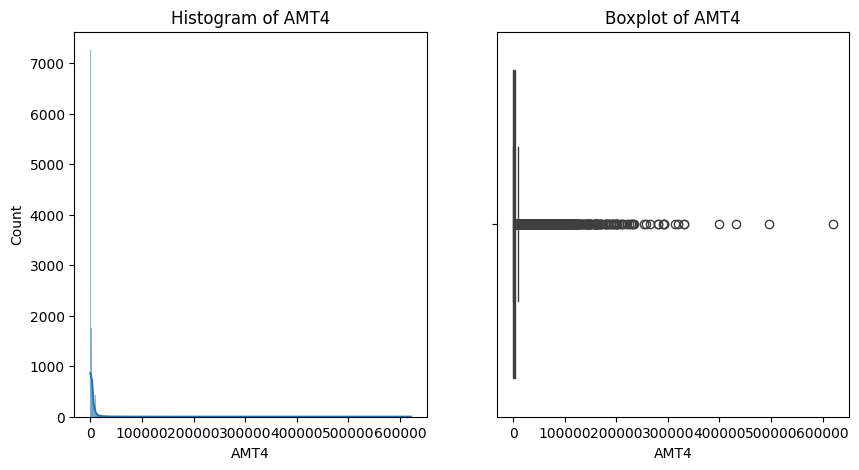

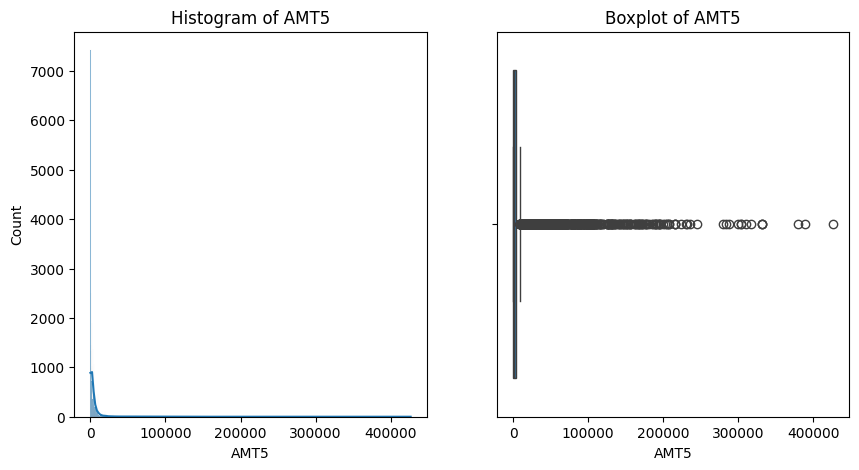

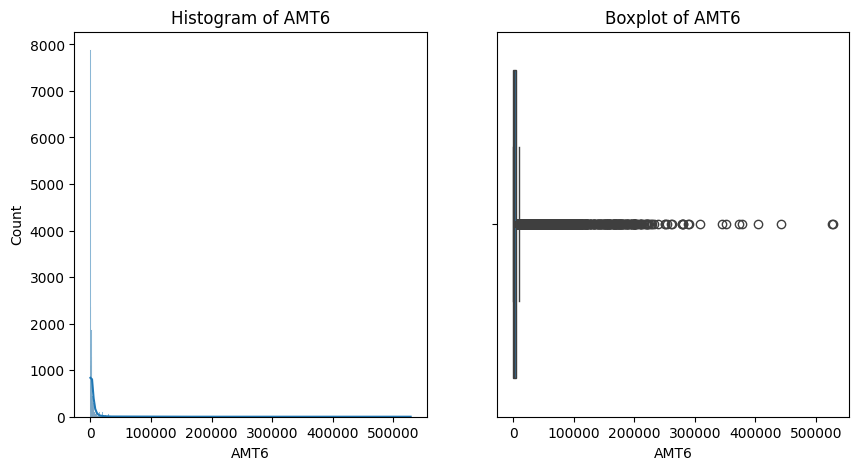

Frequency distribution of SEX:
SEX
2    17999
1    11799
Name: count, dtype: int64




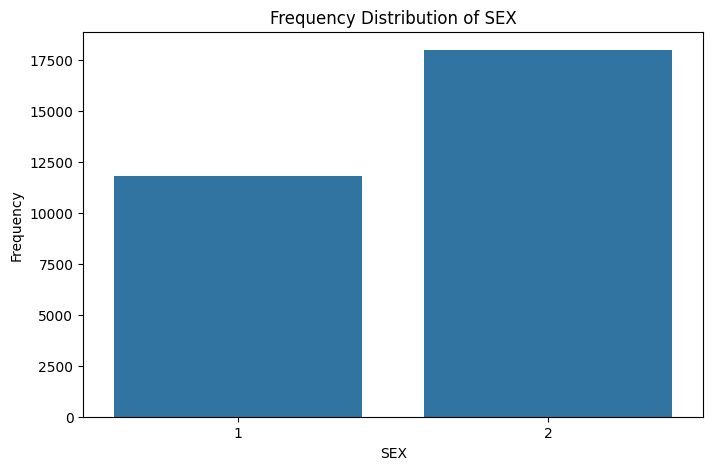

Frequency distribution of EDUCATION:
EDUCATION
2    13965
1    10471
3     4898
4      464
Name: count, dtype: int64




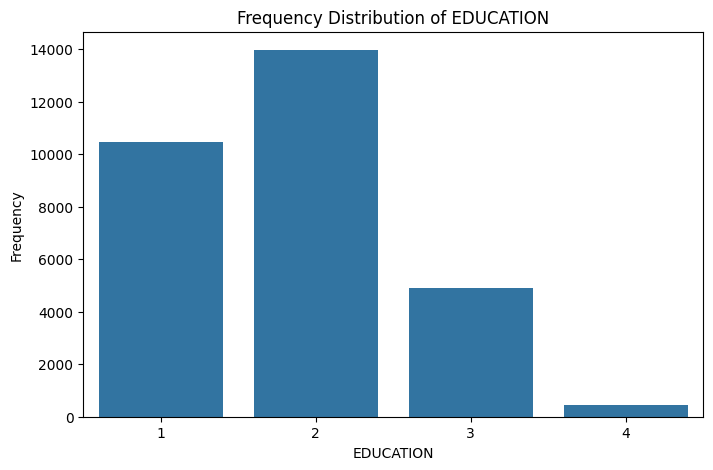

Frequency distribution of MARRIAGE:
MARRIAGE
2    15860
1    13561
3      377
Name: count, dtype: int64




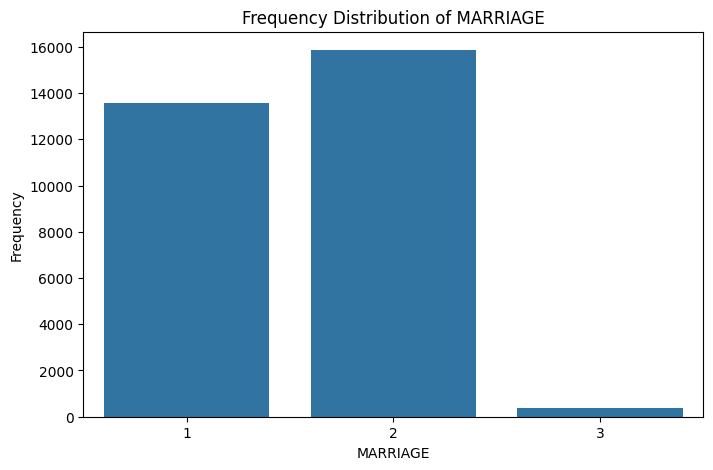

Frequency distribution of Default:
Default
0    23187
1     6611
Name: count, dtype: int64




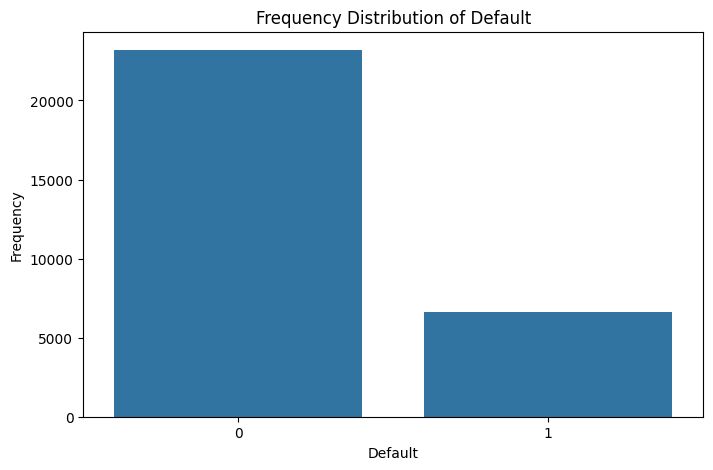

Frequency distribution of PAY0:
PAY0
 0    14640
-1     5660
 1     3656
-2     2721
 2     2658
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64




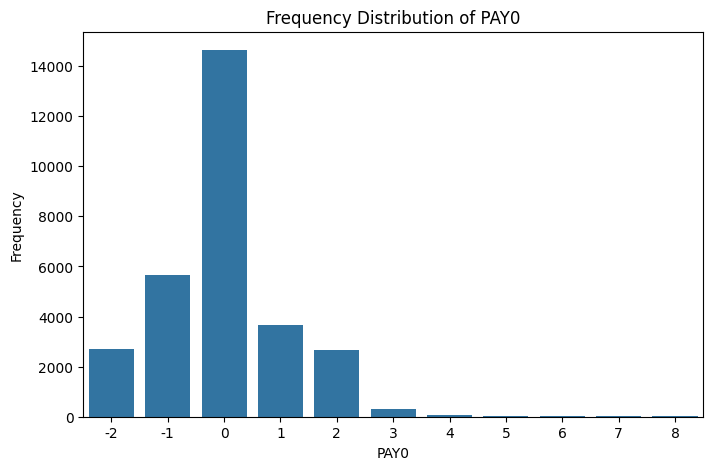

Frequency distribution of PAY2:
PAY2
 0    15628
-1     6024
 2     3916
-2     3719
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64




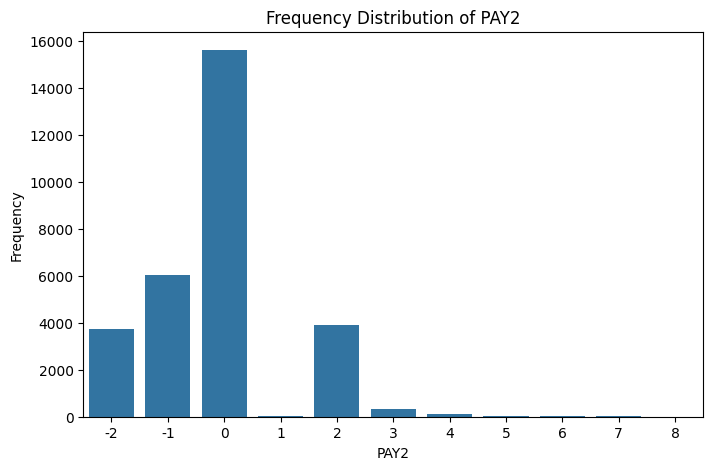

Frequency distribution of PAY3:
PAY3
 0    15667
-1     5903
-2     4025
 2     3811
 3      239
 4       75
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64




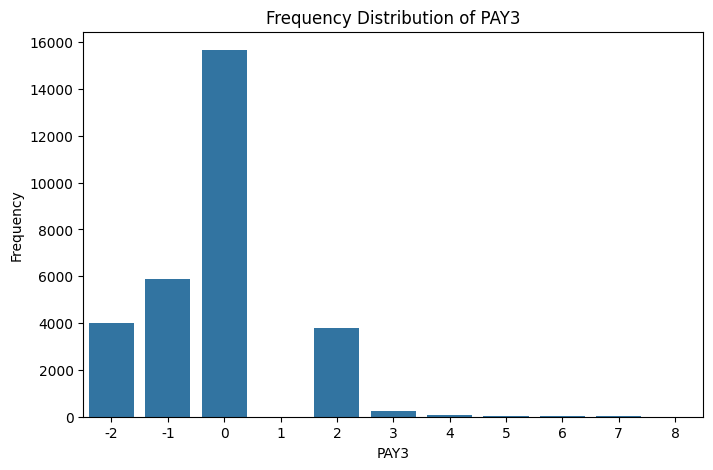

Frequency distribution of PAY4:
PAY4
 0    16351
-1     5653
-2     4289
 2     3156
 3      179
 4       68
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64




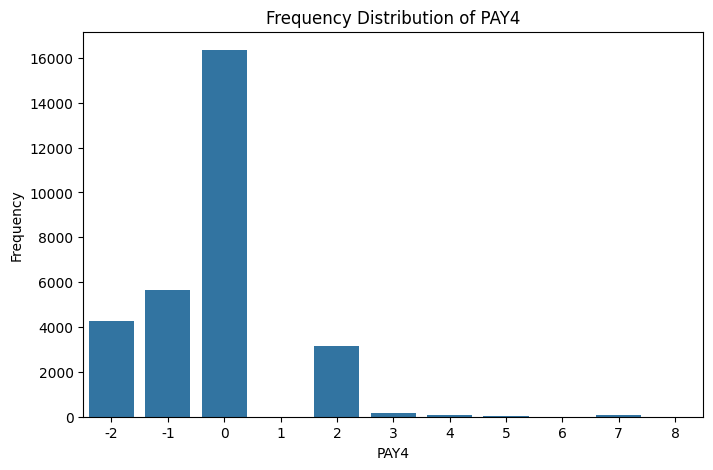

Frequency distribution of PAY5:
PAY5
 0    16844
-1     5502
-2     4489
 2     2623
 3      178
 4       82
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64




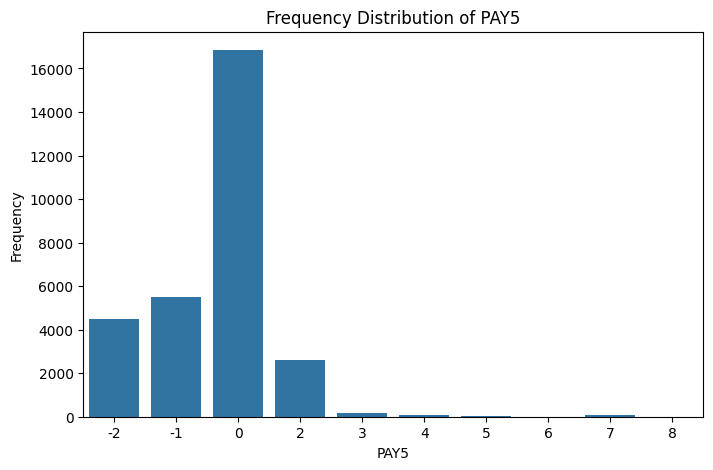

Frequency distribution of PAY6:
PAY6
 0    16182
-1     5706
-2     4834
 2     2765
 3      184
 4       48
 7       46
 6       18
 5       13
 8        2
Name: count, dtype: int64




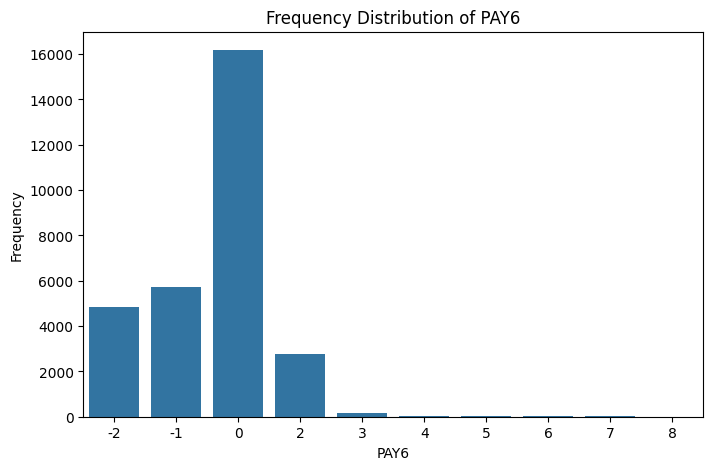

Pivot Table for LIMIT_BAL:
MARRIAGE                   1              2              3
SEX EDUCATION                                             
1   1          258573.996405  187597.078047  169677.419355
    2          158604.255319  111585.948158   75468.750000
    3          137727.708533  100277.357223   76041.666667
    4          202419.753086  132941.176471  125000.000000
2   1          242247.637991  187661.992263  180869.565217
    2          162152.877698  145497.910007   99711.538462
    3          128068.622025  132767.857143   93737.373737
    4          196052.631579  171739.130435  176666.666667

Pivot Table for Default:
MARRIAGE                        1         2         3
SEX AGE_GROUP EDUCATION                              
1   0-24      1          0.285714  0.251825  1.000000
              2          0.340909  0.304545  0.333333
              3          0.400000  0.310811  0.500000
              4          0.000000  0.000000       NaN
    25-34     1          0.228840

In [ ]:
# Summary statistics
def summary_statistics(df):
  return df.describe()

print(summary_statistics(credit_data))

# Inspect distribution with Skewness and Kurtosis
def skewness_kurtosis(df):
  numeric_columns = ['LIMIT_BAL', 'AGE', 'BILL1', 'BILL2', 'BILL3', 'BILL4', 'BILL5',
                     'BILL6', 'AMT1', 'AMT2', 'AMT3', 'AMT4', 'AMT5', 'AMT6']
  for col in numeric_columns:
      skewness = df[col].skew()
      kurtosis = df[col].kurtosis()
      print(f"Skewness of {col}: {skewness}")
      print(f"Kurtosis of {col}: {kurtosis}")

skewness_kurtosis(credit_data)

# Inspect distribution with Histogram and KDE Plot
def inspect_distribution(df):
  numeric_columns = ['LIMIT_BAL', 'AGE', 'BILL1', 'BILL2', 'BILL3', 'BILL4', 'BILL5',
                     'BILL6', 'AMT1', 'AMT2', 'AMT3', 'AMT4', 'AMT5', 'AMT6']
  for col in numeric_columns:
      plt.figure(figsize=(10, 5))
      plt.subplot(1, 2, 1)
      sns.histplot(df[col], kde=True)
      plt.title(f"Histogram of {col}")
      plt
      plt.subplot(1, 2, 2)
      sns.boxplot(x=df[col])
      plt.title(f"Boxplot of {col}")
      plt.show()

inspect_distribution(credit_data)

# Inspect and visualize frequency distribution
def frequency_distribution(df):
  categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE','Default']
  pay_columns = ['PAY0', 'PAY2', 'PAY3', 'PAY4', 'PAY5', 'PAY6']
  for col in categorical_columns + pay_columns:
    print(f"Frequency distribution of {col}:")
    print(df[col].value_counts())
    print("\n")
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[col])
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel
    plt.ylabel("Frequency")
    plt.show()

frequency_distribution(credit_data)

# Segment age into groups
def segment_age(df):
  df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 25, 35, 45, 55, 65, 75, 100],
                           labels=['0-24','25-34', '35-44', '45-54', '55-64', '65-74','75-100'])

segment_age(credit_data)

# Use pivot table to inspect data with categorical grouping
def pivot_bal(df):
  pivot_table = pd.pivot_table(df, values='LIMIT_BAL', index=['SEX', 'EDUCATION'], columns='MARRIAGE',
                               aggfunc='mean', observed=False)
  return pivot_table

def pivot_default(df):
  # Change 'EDUCATION' in columns to a different column, e.g., 'MARRIAGE'
  pivot_table = pd.pivot_table(df, values='Default', index=['SEX', 'AGE_GROUP','EDUCATION'], columns='MARRIAGE',
                               aggfunc='mean', observed=False)
  return pivot_table

print("Pivot Table for LIMIT_BAL:")
print(pivot_bal(credit_data))

print("\nPivot Table for Default:")
print(pivot_default(credit_data))

# Diagnostic Analytics
1. Correlation analysis: calculate the pair correlation coefficients for numerical columns.
2. Correlation Visualization: creating heatmap to visuzlly represent the strength and directionof correlations between numeric variables.
3. Perform cross-tabulation for categorical columns like sex, education, marriage against the target variable. Further explore relationships between demographic variables and payment status.
4. Implement logistic regression to explore the relationship between the target variable and other features.

           LIMIT_BAL       AGE     BILL1     BILL2     BILL3     BILL4  \
LIMIT_BAL   1.000000  0.141596  0.268911  0.262383  0.267611  0.278416   
AGE         0.141596  1.000000  0.051714  0.049824  0.049389  0.046920   
BILL1       0.268911  0.051714  1.000000  0.949667  0.888441  0.856447   
BILL2       0.262383  0.049824  0.949667  1.000000  0.925693  0.888945   
BILL3       0.267611  0.049389  0.888441  0.925693  1.000000  0.922241   
BILL4       0.278416  0.046920  0.856447  0.888945  0.922241  1.000000   
BILL5       0.280290  0.044998  0.827084  0.856872  0.882854  0.939605   
BILL6       0.273344  0.042877  0.800141  0.828953  0.852619  0.900226   
AMT1        0.191705  0.025429  0.135529  0.280903  0.240962  0.228736   
AMT2        0.176387  0.021186  0.096003  0.097086  0.317435  0.204063   
AMT3        0.205239  0.024645  0.133017  0.124511  0.112138  0.286391   
AMT4        0.199439  0.019780  0.158735  0.146734  0.143408  0.128689   
AMT5        0.206573  0.022049  0.1649

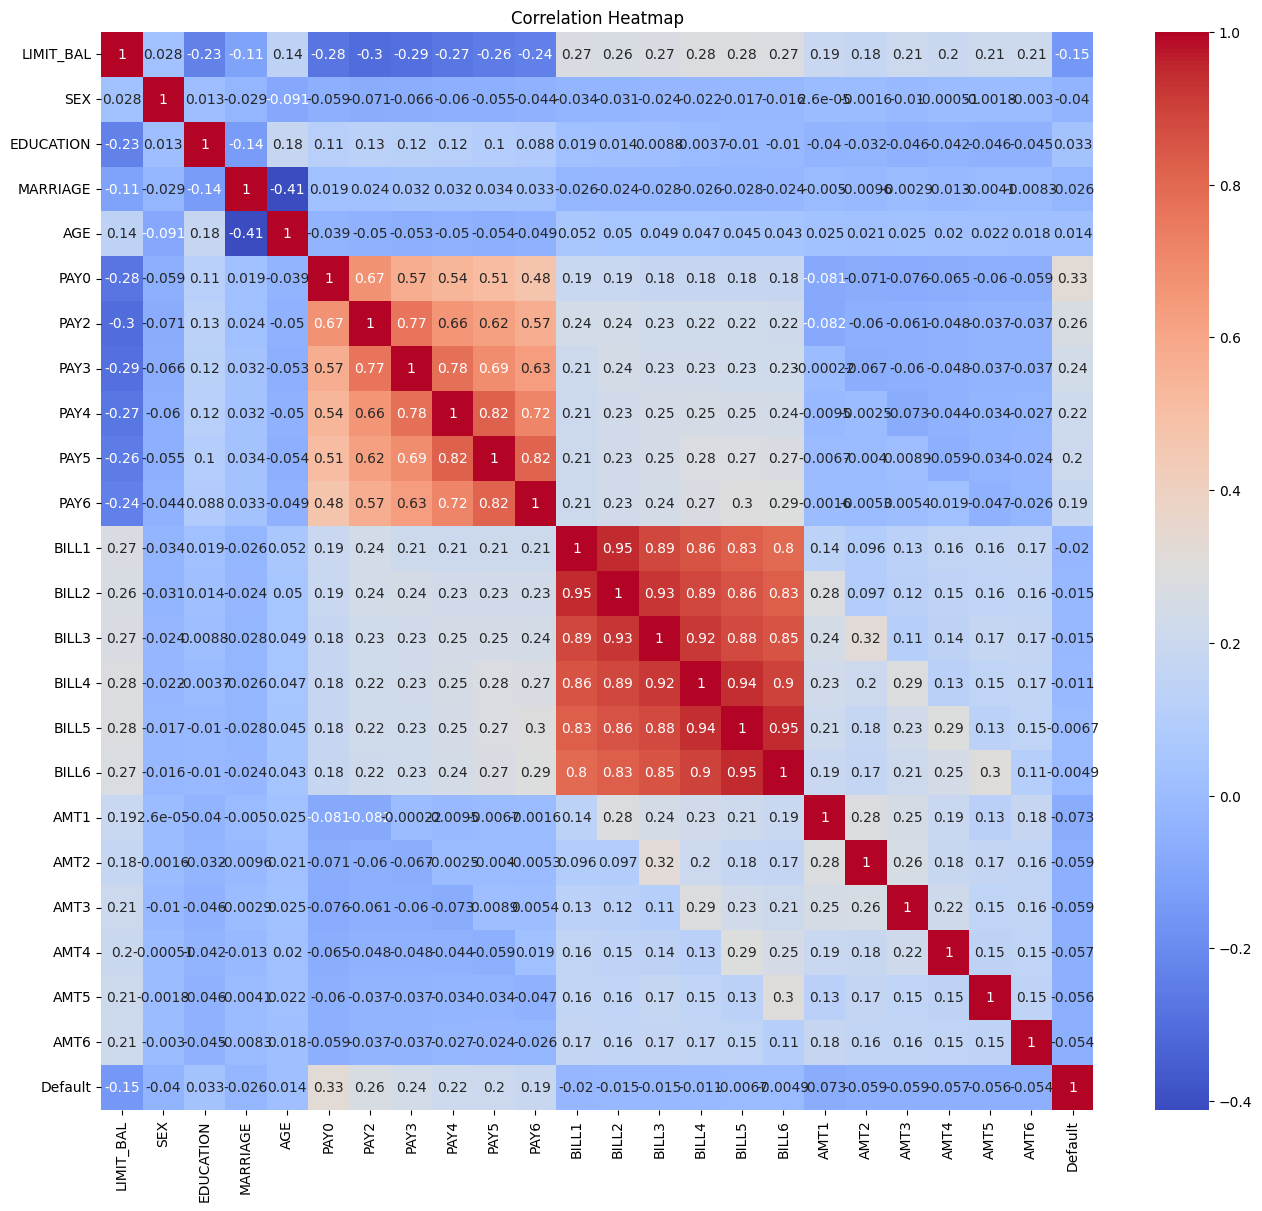

Cross-tabulation for SEX:
Default      0     1
SEX                 
1         8937  2862
2        14250  3749


Cross-tabulation for EDUCATION:
Default        0     1
EDUCATION             
1           8446  2025
2          10647  3318
3           3662  1236
4            432    32


Cross-tabulation for MARRIAGE:
Default       0     1
MARRIAGE             
1         10376  3185
2         12523  3337
3           288    89


Cross-tabulation for SEX vs PAY0:
PAY0    -2    -1     0     1     2    3   4   5   6   7   8
SEX                                                        
1      853  2118  5989  1483  1114  159  44  18   6   5  10
2     1868  3542  8651  2173  1544  163  32   8   5   4   9


Cross-tabulation for SEX vs PAY2:
PAY2    -2    -1     0   1     2    3   4   5   6   7   8
SEX                                                      
1     1203  2209  6422  14  1703  156  60  14   7  11   0
2     2516  3815  9206  14  2213  170  39  11   5   9   1


Cross-tabulation for SEX vs P

<Figure size 1500x1000 with 0 Axes>

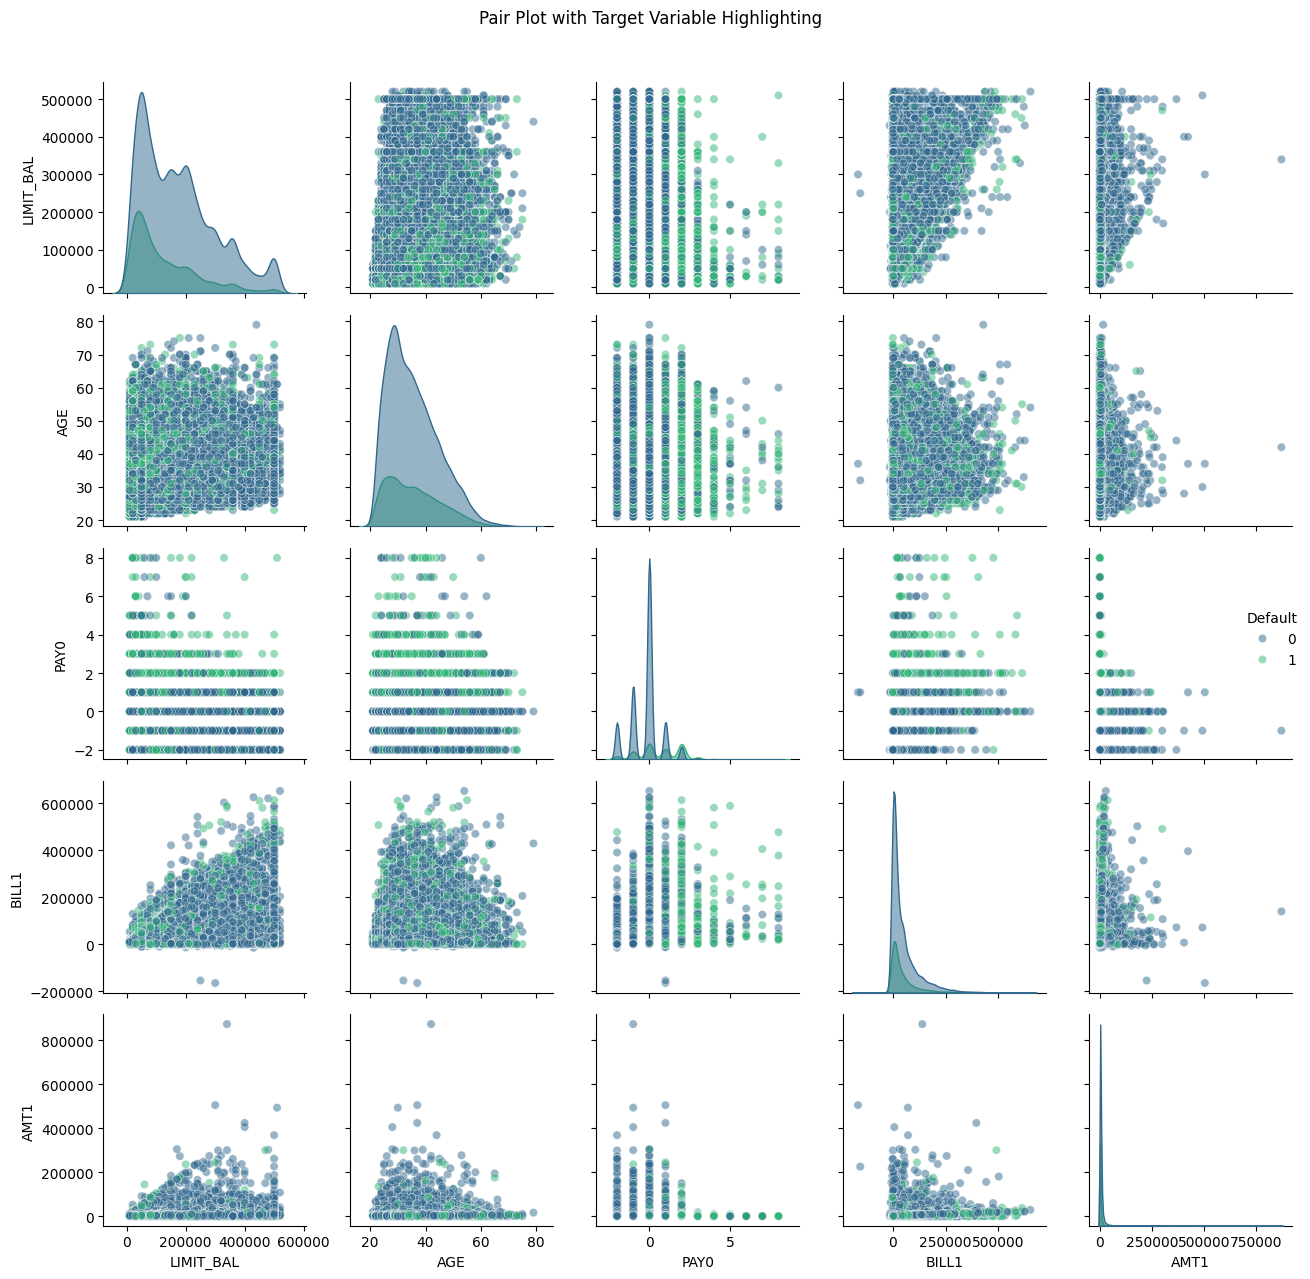

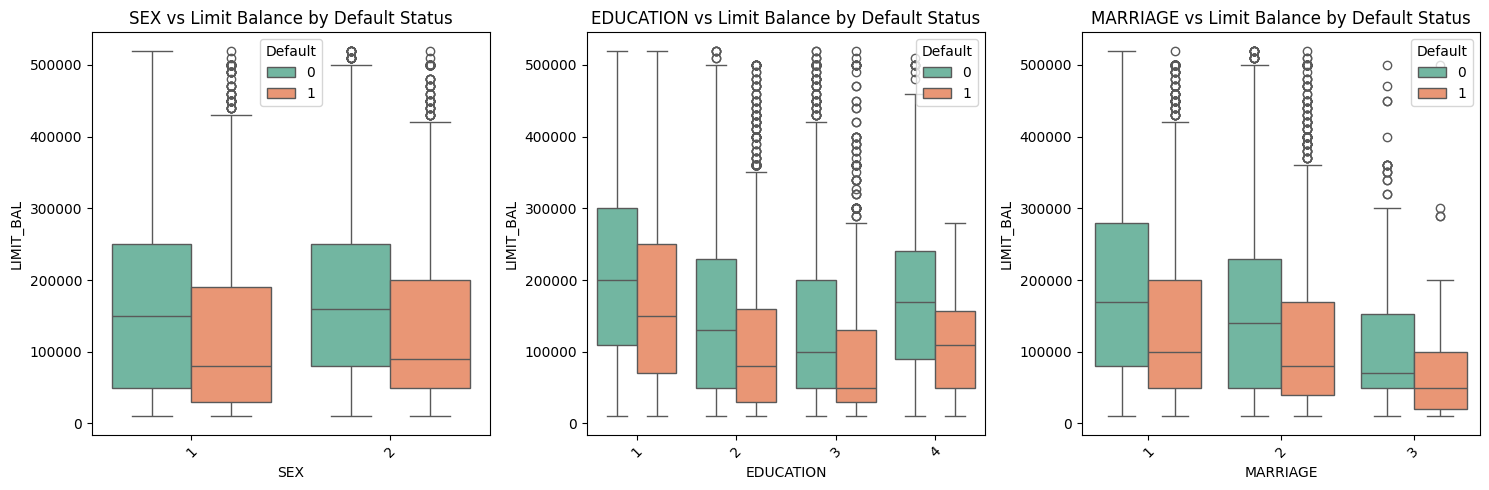

Optimization terminated successfully.
         Current function value: 0.460923
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                20858
Model:                          Logit   Df Residuals:                    20834
Method:                           MLE   Df Model:                           23
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.1253
Time:                        19:31:51   Log-Likelihood:                -9613.9
converged:                       True   LL-Null:                       -10991.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6448      0.144     -4.473      0.000      -0.927      -0.362
LIMIT_BAL  -7.085e-07   1.93e

In [ ]:
# Inspect correlation
def correlation(df):
  numeric_columns = ['LIMIT_BAL','AGE', 'BILL1', 'BILL2', 'BILL3', 'BILL4', 'BILL5',
                     'BILL6', 'AMT1', 'AMT2', 'AMT3', 'AMT4', 'AMT5', 'AMT6']
  df = df[numeric_columns]
  return df.corr()

print(correlation(credit_data))

# Visualize correlation with Heatmap
def correlation_matrix(df):
  numerical_df = df.select_dtypes(include=np.number)
  plt.figure(figsize=(16, 14))
  sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()
  return numerical_df.corr()

correlation_matrix(credit_data)

# Use cross-tabulation for categorical columns
def cross_tabulation(df):
  categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']
  for col in categorical_columns:
    print(f"Cross-tabulation for {col}:")
    print(pd.crosstab(df[col], df['Default']))
    print("\n")

cross_tabulation(credit_data)

def cross_tabulation_pay(df):
  categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']
  pay_columns = ['PAY0', 'PAY2', 'PAY3', 'PAY4', 'PAY5', 'PAY6']
  for cat_col in categorical_columns:
    for pay_col in pay_columns:
        print(f"Cross-tabulation for {cat_col} vs {pay_col}:")
        print(pd.crosstab(df[cat_col], df[pay_col]))
        print("\n")

cross_tabulation_pay(credit_data)

# Visualization for multivariate analysis
def multivariate_analysis(df):
  # Pair Plot with Hue based on Target Variable
  plt.figure(figsize=(15,10))
  subset_columns = ['LIMIT_BAL', 'AGE', 'PAY0', 'BILL1', 'AMT1', 'Default']
  g = sns.pairplot(df[subset_columns], hue='Default',
                     plot_kws={'alpha': 0.5},
                     diag_kws={'alpha': 0.5},
                     palette='viridis')
  g.fig.suptitle('Pair Plot with Target Variable Highlighting', y=1.02)
  plt.tight_layout()
  plt.show()

  # Parallel Coordinates Plot using Plotly
  def normalize_column(series):
        return (series - series.min()) / (series.max() - series.min())

  # Select columns for parallel coordinates
  parallel_cols = ['LIMIT_BAL', 'AGE', 'PAY0', 'BILL1', 'AMT1', 'Default']
  df_normalized = df[parallel_cols].copy()

  # Normalize numeric columns
  for col in parallel_cols[:-1]:  # Exclude target variable
      df_normalized[col] = normalize_column(df_normalized[col])

  # Create Parallel Coordinates Plot
  fig = px.parallel_coordinates(
        df_normalized,
        color='Default',
        title='Parallel Coordinates Plot',
        color_continuous_scale=px.colors.sequential.Viridis
  )
  fig.show()

  # Box Plots for Categorical Variables
  categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']
  plt.figure(figsize=(15,5))

  for i, var in enumerate(categorical_columns, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(x=var, y='LIMIT_BAL', hue='Default',
                    data=df, palette='Set2')
        plt.title(f'{var} vs Limit Balance by Default Status')
        plt.xticks(rotation=45)

  plt.tight_layout()
  plt.show()

multivariate_analysis(credit_data)

# Logistic regression analysis
def logistic_regression(df):
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import classification_report, confusion_matrix
  import statsmodels.api as sm

  # Select features and target variable
  X = X = df.drop(labels=['Default','AGE_GROUP'], axis=1)
  y = credit_data['Default']

  # Split data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Logistic regression using statsmodels for detailed summary
  X_train_const = sm.add_constant(X_train)  # Adding constant for intercept
  logit_model = sm.Logit(y_train, X_train_const)
  result = logit_model.fit()

  # Display the summary to interpret coefficients and p-values
  print(result.summary())

logistic_regression(credit_data)

# Diagnostic Analytics (Statistical Testing)
1. T-test: comparing the means of numeric variables between two groups(when defualt = 0 and default = 1)
2. Chi-square Test: testing the association between categorical variables and default status.
3. T-test insights: Default group has significantly lower credit limits compared to non-default group. defualt group consistently has lower repayment amounts compared to non-default group.
4. Chi-square Test: payment history(PAY0-PAY6) are the strongest predictor of default.

In [ ]:
# T-test for numeric columns
def t_test(df, numeric_columns):
    results = {} # Dictionary containing test results for each column

    for column in numeric_columns:

        # Separate values based on Default status
        group_default = df[df['Default'] == 1][column]
        group_non_default = df[df['Default'] == 0][column]

        # Perform t-test
        try:
            t_stat, p_value = ttest_ind(group_default, group_non_default,
                                      nan_policy='omit',
                                      equal_var=False)  # Using Welch's t-test

            # Store results
            results[column] = {
                't_statistic': t_stat,
                'p_value': p_value,
                'mean_default': group_default.mean(),
                'mean_non_default': group_non_default.mean(),
                'difference': group_default.mean() - group_non_default.mean()
            }

            # Print results with effect size
            print(f"\nColumn: {column}")
            print(f"  T-Test Statistic: {t_stat:.4f}")
            print(f"  p-value: {p_value:.4e}")
            print(f"  Mean (Default): {group_default.mean():.4f}")
            print(f"  Mean (Non-Default): {group_non_default.mean():.4f}")
            print(f"  Difference: {group_default.mean() - group_non_default.mean():.4f}")

        except Exception as e:
            print(f"Error analyzing {column}: {str(e)}")

    return results

# Chi-square test for categorical columns
def chi_square_test(df, categorical_columns):
    results = {} # Dictionary containing test results for each column

    for cat_col in categorical_columns:

        try:
            # Create contingency table
            contingency_table = pd.crosstab(df[cat_col], df['Default'])

            # Perform chi-square test
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)

            # Calculate Cramer's V for effect size
            n = contingency_table.sum().sum()
            min_dim = min(contingency_table.shape) - 1
            cramer_v = np.sqrt(chi2 / (n * min_dim))

            # Store results
            results[cat_col] = {
                'chi2': chi2,
                'p_value': p_value,
                'dof': dof,
                'cramers_v': cramer_v
            }

            # Print detailed results
            print(f"\nChi-square Test Results for {cat_col}:")
            print(f"  Chi-square statistic: {chi2:.4f}")
            print(f"  p-value: {p_value:.4e}")
            print(f"  Degrees of freedom: {dof}")
            print(f"  Cramer's V: {cramer_v:.4f}")

            # Print contingency table
            print("\nContingency Table:")
            print(contingency_table)

        except Exception as e:
            print(f"Error analyzing {cat_col}: {str(e)}")

    return results

numeric_columns = ['LIMIT_BAL', 'AGE', 'BILL1', 'BILL2', 'BILL3', 'BILL4', 'BILL5',
                  'BILL6', 'AMT1', 'AMT2', 'AMT3', 'AMT4', 'AMT5', 'AMT6']

categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY0', 'PAY2', 'PAY3',
                      'PAY4', 'PAY5', 'PAY6']

# Run the tests
t_test_results = t_test(credit_data, numeric_columns)
chi_square_results = chi_square_test(credit_data, categorical_columns)


Column: LIMIT_BAL
  T-Test Statistic: -28.8546
  p-value: 5.4031e-177
  Mean (Default): 128624.6680
  Mean (Non-Default): 175265.5367
  Difference: -46640.8687

Column: AGE
  T-Test Statistic: 2.3580
  p-value: 1.8392e-02
  Mean (Default): 35.7111
  Mean (Non-Default): 35.3967
  Difference: 0.3144

Column: BILL1
  T-Test Statistic: -3.5054
  p-value: 4.5780e-04
  Mean (Default): 47838.5993
  Mean (Non-Default): 51345.6576
  Difference: -3507.0583

Column: BILL2
  T-Test Statistic: -2.5357
  p-value: 1.1237e-02
  Mean (Default): 46648.9646
  Mean (Non-Default): 49108.9967
  Difference: -2460.0321

Column: BILL3
  T-Test Statistic: -2.5580
  p-value: 1.0540e-02
  Mean (Default): 44552.8979
  Mean (Non-Default): 46935.6114
  Difference: -2382.7135

Column: BILL4
  T-Test Statistic: -1.8582
  p-value: 6.3162e-02
  Mean (Default): 41424.6102
  Mean (Non-Default): 43039.1249
  Difference: -1614.5147

Column: BILL5
  T-Test Statistic: -1.1410
  p-value: 2.5388e-01
  Mean (Default): 39025.427

# Predictive Model 1: Decision Tree
1. Using classification model(decision tree) to predict default status based on the independent features.
2. Train-Test Data Split: split into 70% training data and 30% testing sets.
3. Training data using entropy(information gain)
4. Model accuracy is calculated against predicted result and actual result. Accuracy is evaluated for tree depths of 3, 5, 10.
5. Visualization: plot shows accuracy changes with tree depth, and the final decision tree is plotted, displaying splits at each node. A horizontal bar chart ranks features by their information gain.
6. Model Insights: Decison tree achieves 73% accuracy overall. Best accuracy 82% is with depths 3 or 5. Top key predictors are current payment status, age, credit limit and repayment amount.


Basic Decision Tree Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      6918
           1       0.38      0.39      0.39      2022

    accuracy                           0.72      8940
   macro avg       0.60      0.60      0.60      8940
weighted avg       0.72      0.72      0.72      8940

Depth: 3, Accuracy: 0.82
Depth: 5, Accuracy: 0.81
Depth: 10, Accuracy: 0.80
Depth: None, Accuracy: 0.72


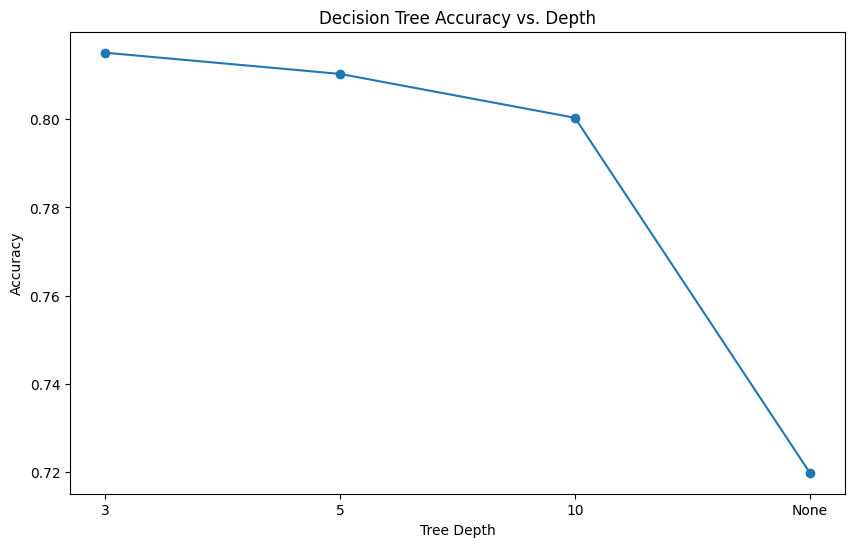

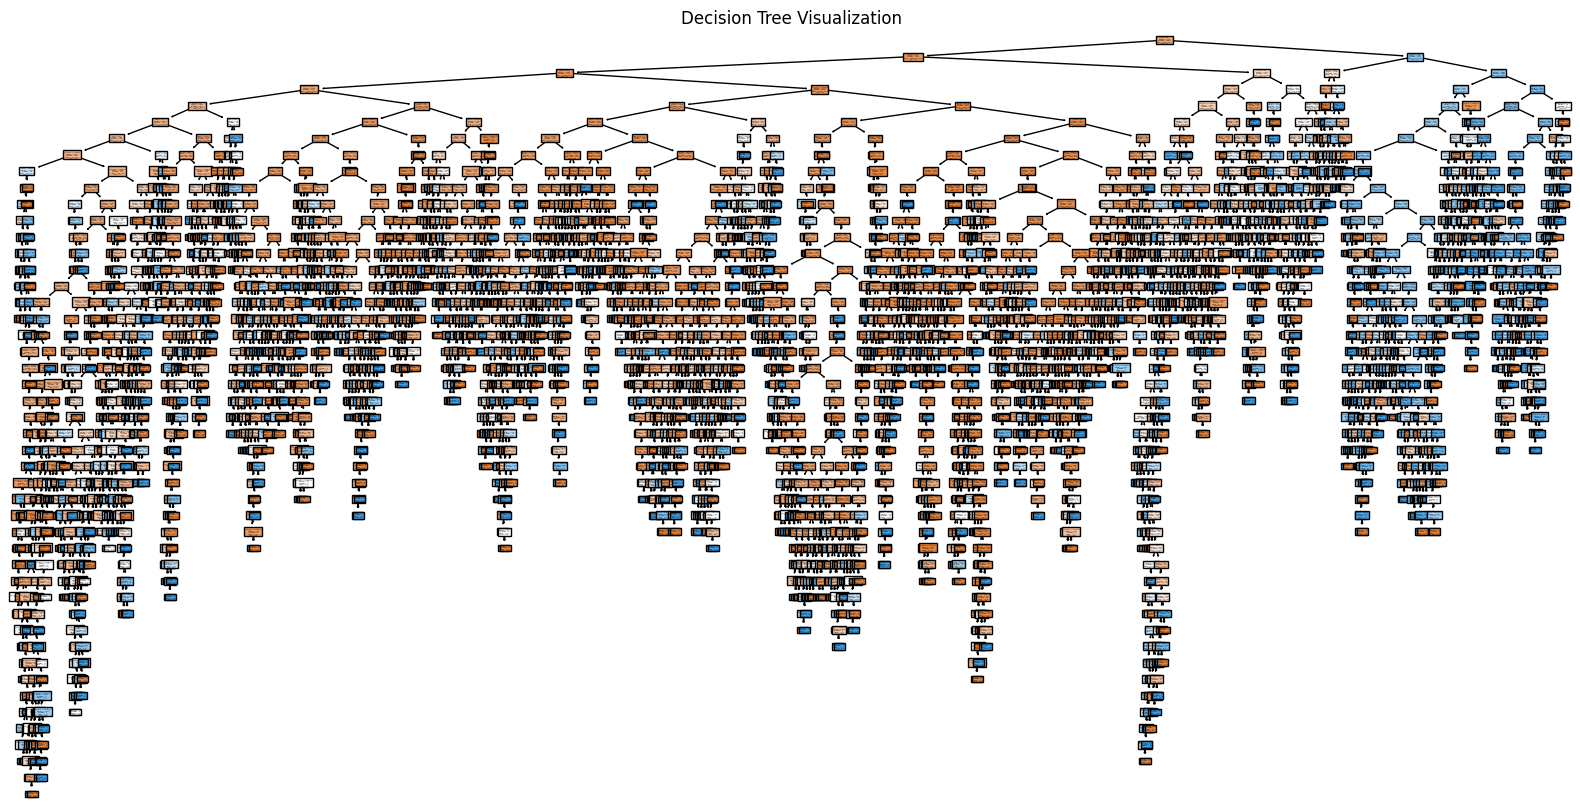

      Feature  Information Gain
5        PAY0          0.131205
4         AGE          0.073094
11      BILL1          0.069052
0   LIMIT_BAL          0.067864
19       AMT3          0.062151
22       AMT6          0.055256
17       AMT1          0.053760
15      BILL5          0.048568
21       AMT5          0.048470
18       AMT2          0.047541
13      BILL3          0.047452
16      BILL6          0.047445
12      BILL2          0.046718
14      BILL4          0.046130
20       AMT4          0.045956
6        PAY2          0.034470
2   EDUCATION          0.017603
1         SEX          0.012347
3    MARRIAGE          0.012105
7        PAY3          0.010163
9        PAY5          0.008827
10       PAY6          0.007378
8        PAY4          0.006445


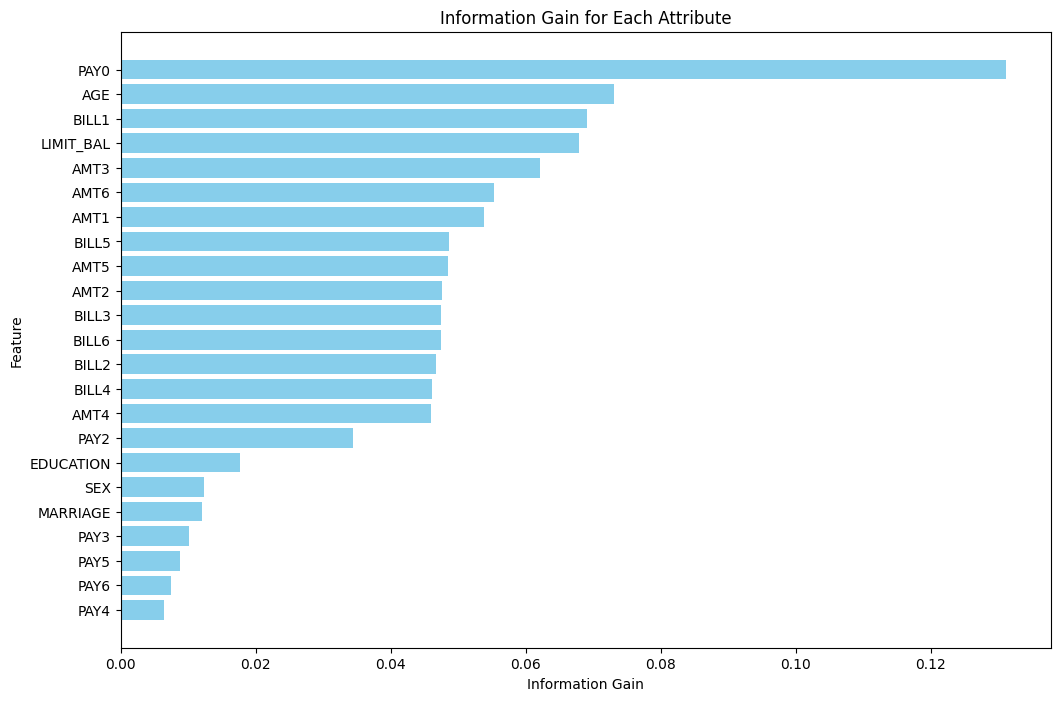

In [ ]:
# Decision Tree
def decision_tree(df):

  # Select features and target variable
  X = df.drop(labels=['Default', 'AGE_GROUP'], axis=1)
  y = credit_data['Default']

  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Train a basic Decision Tree
  clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
  clf.fit(X_train, y_train)

  # Predict on test data and measure accuracy
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Basic Decision Tree Accuracy: {accuracy:.2f}')
  print(classification_report(y_test, y_pred))

  # Experiment with different tree depths
  depths = [3, 5, 10, None]
  accuracies = []
  for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'Depth: {depth}, Accuracy: {acc:.2f}')

  # Plot accuracies vs. tree depths
  plt.figure(figsize=(10, 6))
  plt.plot([str(d) for d in depths], accuracies, marker='o')
  plt.title('Decision Tree Accuracy vs. Depth')
  plt.xlabel('Tree Depth')
  plt.ylabel('Accuracy')
  plt.show()

  # Visualize the decision tree
  plt.figure(figsize=(20, 10))
  tree.plot_tree(clf, feature_names=X.columns, class_names=['Yes', 'No'], filled=True)
  plt.title('Decision Tree Visualization')
  plt.show()

decision_tree(credit_data)

# Decision Tree Entropy
def decision_tree_entropy(df):
  from sklearn.model_selection import train_test_split
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import accuracy_score, classification_report
  from sklearn import tree

  # Select features and target variable
  X = df.drop(labels=['Default', 'AGE_GROUP'], axis=1)
  y = credit_data['Default']

  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Train a Decision Tree classifier using Information Gain (entropy)
  clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
  clf.fit(X_train, y_train)

  # Extract feature importances (Information Gain) from the model
  information_gain = clf.feature_importances_

  # Create a DataFrame to display feature names and their Information Gain
  feature_importance_df = pd.DataFrame({
      'Feature': X.columns,
      'Information Gain': information_gain
  }).sort_values(by='Information Gain', ascending=False)

  # Display the DataFrame
  print(feature_importance_df)

  # Plot the Information Gain for each feature
  plt.figure(figsize=(12, 8))
  plt.barh(feature_importance_df['Feature'], feature_importance_df['Information Gain'], color='skyblue')
  plt.xlabel('Information Gain')
  plt.ylabel('Feature')
  plt.title('Information Gain for Each Attribute')
  plt.gca().invert_yaxis()
  plt.show()

decision_tree_entropy(credit_data)

# Predictive Model 2: Regression Model
1. Using logistic regression model to predict default based on selected independent variables.
2. Data split into 80% and 20% testing sets
3. Standardize independent variables to normalize data for better performance.
4. Logistic regression model trained with maximum of 1000 iterations.
5. Model Insights: Accuracy of 81.95% on the test set. The model has a high accuracy on default = 0, struggles a little bit to identify the minority class default = 1

Accuracy:  0.8095637583892618
Score:  0.8095637583892618
Report: 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4640
           1       0.70      0.24      0.36      1320

    accuracy                           0.81      5960
   macro avg       0.76      0.61      0.62      5960
weighted avg       0.79      0.81      0.77      5960



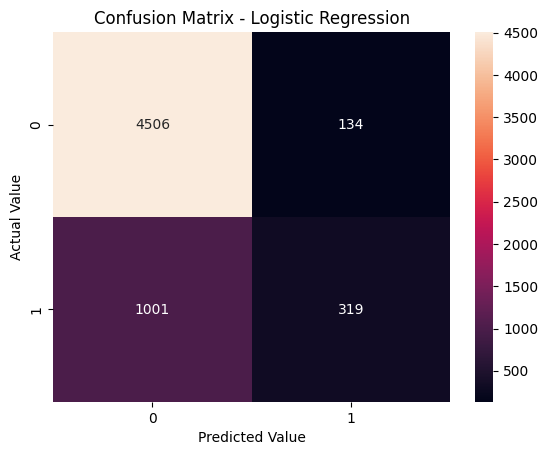

In [ ]:
# Logistic Regression
def logistic_linear_regression(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

    x_df = df.drop(labels=['Default', 'AGE_GROUP'], axis=1)

    y_df = df["Default"]

    # splitting the data
    X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.20, random_state=40)

    # Scale the indepedent columns
    scaler = StandardScaler()

    X_train_standard = scaler.fit_transform(X_train)
    X_test_Standard = scaler.transform(X_test)

    # creating the logistic regression model
    logreg = LogisticRegression(max_iter=1000, random_state=42)

    # training/fitting the model
    logreg.fit(X_train_standard, y_train)

    #Step 5: test the model - using predict(x_test)
    predicted_default = logreg.predict(X_test_Standard)

    # Logistic model evaluation:
    print("Accuracy: ", accuracy_score(y_test, predicted_default))
    print("Score: ",  logreg.score(X_test_Standard, y_test))
    print("Report: ")
    print(classification_report(y_test, predicted_default))
    #print("Coefficients:", logreg.coef_)


    conf_matrix = confusion_matrix(y_test, predicted_default)

    sns.heatmap(conf_matrix, annot = True, fmt='d')
    plt.title("Confusion Matrix - Logistic Regression")
    plt.ylabel("Actual Value")
    plt.xlabel("Predicted Value")
    plt.show()

results = logistic_linear_regression(credit_data)

# Predictive Model 3: Naive Bayesian Classifiers
1. Using Gaussian Naive Bayes classifier to predict default based on the independent variables.
2. data split into 70% and 30% testing sets
3. standardize independent variables to normalize data.
4. setup the model and making the predictions
5. Model Insights: accuracy of 67.06% on the test set, which is relatively moderate. A recall of 68% for the default = 1 indicates that the model effectively identifies default which is better than logistic regression.


Naive Bayesian Results:
Accuracy: 0.7506

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      6918
           1       0.46      0.58      0.51      2022

    accuracy                           0.75      8940
   macro avg       0.66      0.69      0.67      8940
weighted avg       0.77      0.75      0.76      8940



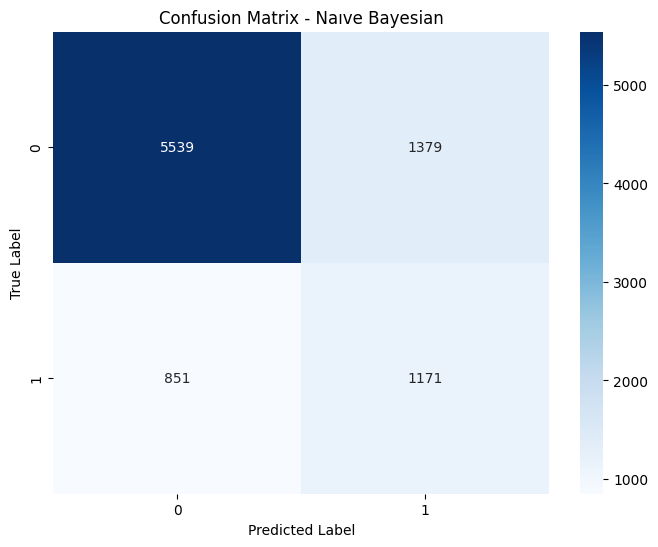

In [ ]:
# Naıve Bayesian Classifiers
def naive_bayes(df):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

    # Select features and target variable
    X = df.drop(labels=['Default','AGE_GROUP'], axis=1)
    y = df['Default']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model setup
    model = GaussianNB()
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print("\nNaive Bayesian Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Naıve Bayesian')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return {
        "model": model,
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
    }

results = naive_bayes(credit_data)